# t分布

In [9]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
from scipy.stats import t, norm
import imageio.v2 as imageio
from pathlib import Path
import os
set_plot_params()
name = Path().cwd().name + "/t"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


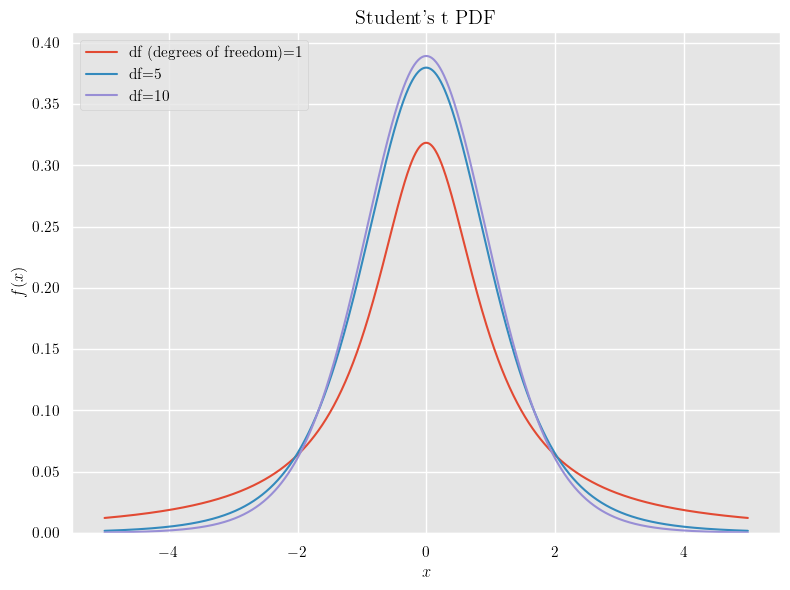

In [23]:
# パラメータ
dfs = [1, 5, 10]   # 自由度
x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(8, 6))
for i, df in enumerate(dfs):
    if i==0:
        plt.plot(x, t.pdf(x, df), label=rf"df (degrees of freedom)={df}")
    else:
        plt.plot(x, t.pdf(x, df), label=rf"df={df}")
plt.title("Student's t PDF")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(0, None)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.savefig(save_dir.joinpath("pdf.png"), dpi=300, bbox_inches="tight")
plt.show()

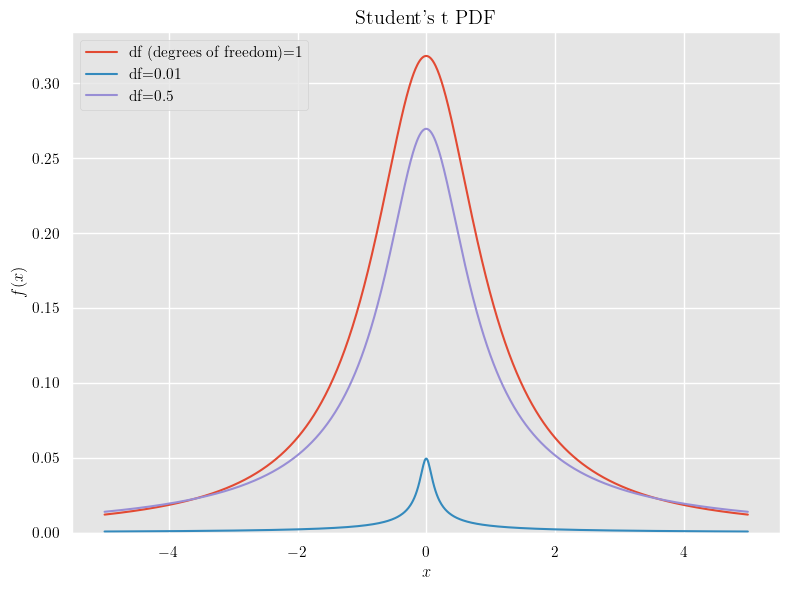

In [35]:
# パラメータ
dfs = [1, 0.01, 0.5]   # 自由度
x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(8, 6))
for i, df in enumerate(dfs):
    if i==0:
        plt.plot(x, t.pdf(x, df), label=rf"df (degrees of freedom)={df}")
    else:
        plt.plot(x, t.pdf(x, df), label=rf"df={df}")
plt.title("Student's t PDF")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(0, None)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# パラメータ
x = np.linspace(-5, 5, 1000)
dfs = np.arange(1, 31, step=1)
frames = []

# 正規分布PDF（比較用）
norm_pdf = norm.pdf(x, loc=0, scale=1)
frame_paths = []
for df in dfs:
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, t.pdf(x, df), label=rf"t PDF (df={df})")
    ax.plot(x, norm_pdf, linestyle="--", label="Normal(0,1)")
    ax.set_title("Convergence of t PDF to Normal as df increases")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f(x)$")
    ax.set_ylim(0, 0.45)
    ax.grid(True)
    ax.legend()
    frame_path = save_dir / f"t_pdf_df_{df:04d}.png"
    frame_paths.append(frame_path)
    plt.tight_layout()
    plt.savefig(frame_path, dpi=200, bbox_inches="tight")
    plt.close(fig)
    frames.append(imageio.imread(frame_path))

# GIF作成
gif_path = save_dir / "pdf.gif"
imageio.mimsave(gif_path, frames, duration=0.5, loop=0)
for path in frame_paths:
    os.remove(path)

print(f"Saved GIF to: {gif_path}")

Saved GIF to: /home/katsuji/project/shioru/src/.vuepress/public/assets/images/probability_distribution/t/pdf.gif


# CDF

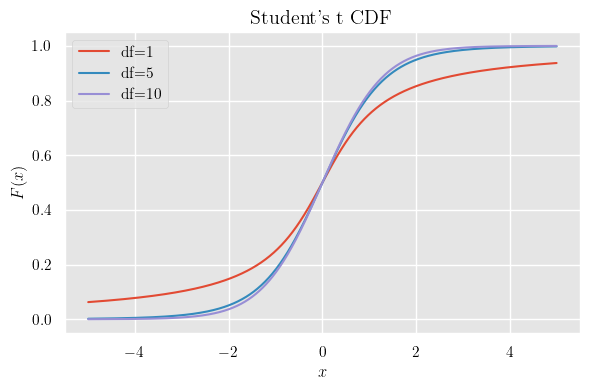

In [27]:
x = np.linspace(-5, 5, 1000)
dfs = [1, 5,10]

plt.figure(figsize=(6, 4))
for df in dfs:
    plt.plot(x, t.cdf(x, df), label=rf"df={df}")
plt.title("Student's t CDF")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.ylim(-0.05, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(save_dir.joinpath("cdf.png"), dpi=300, bbox_inches="tight")
plt.show()

In [28]:
from math import gamma, sqrt, pi
from mpmath import betainc  # mpmath が必要

In [33]:
from mpmath import betainc

# ==== CDF実装（SciPy不使用版）====
def t_cdf_vec(x, n):
    x = np.asarray(x, dtype=float)
    s = np.sign(x)
    ax = np.abs(x)
    a, b = n/2.0, 0.5
    z = n / (n + ax**2)
    I = np.array([betainc(a, b, 0, zi, regularized=True) for zi in z], dtype=float)
    F = 0.5 + 0.5 * s * (1.0 - I)
    return F


# ==== パラメータ ====
x = np.linspace(-5, 5, 1000)
dfs = list(range(1, 31))  # 1..50
norm_cdf = norm.cdf(x)

frames = []
frame_paths = []

for df in dfs:
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(x, t_cdf_vec(x, df), label=rf"t CDF (df={df})")
    ax.plot(x, norm_cdf, linestyle="--", label="Normal(0,1) CDF")
    ax.set_title("Convergence of t CDF to Normal as df increases")
    ax.set_xlabel("$x$")
    ax.set_ylabel("$F(x)$")
    ax.set_ylim(-0.05, 1.05)
    ax.grid(True)
    ax.legend()
    frame_path = save_dir / f"t_cdf_df_{df:04d}.png"
    plt.tight_layout()
    plt.savefig(frame_path, dpi=200, bbox_inches="tight")
    plt.close(fig)
    frame_paths.append(frame_path)
    frames.append(imageio.imread(frame_path))

# ==== GIF作成（無限ループ）====
gif_path = save_dir / "cdf.gif"
imageio.mimsave(gif_path, frames, duration=0.5, loop=0)

# 一時ファイル削除
for p in frame_paths:
    try:
        os.remove(p)
    except OSError:
        pass

print(f"Saved GIF to: {gif_path}")


Saved GIF to: /home/katsuji/project/shioru/src/.vuepress/public/assets/images/probability_distribution/t/cdf.gif
